# Parametric Screw Conveyor

main function: move Material from A to B

high level design parameters: 

- mass flow
- storage volume


## Requirements:
- easy to maintain
- use standardized parts where possible
- look for 

## Parts

1. Hopper - store the material
2. Pipe/Barrel - guide the material
3. Drive - first manual, later motor driven
4. Bearing - hold vertical and horizontal forces
5. Screw - Wood drill seems to be a widely avail. solution
6. Frame - hold everything together

In [1]:
# Paramters

parameters = {'length' : 2, # m 
              'width'  : 1, # m
              'height' : 1, # m
            }

In [2]:
from pathlib import Path
data_path = ''

In [3]:
# export parameters as .yaml
'''
import yaml

par_file = Path(data_path + 'par_file.yml')
with open(par_file, 'w') as outfile:
    yaml.dump(parameters, outfile, default_flow_style=False)
'''

"\nimport yaml\n\npar_file = Path(data_path + 'par_file.yml')\nwith open(par_file, 'w') as outfile:\n    yaml.dump(parameters, outfile, default_flow_style=False)\n"

In [4]:
# export parameters as .json 
import json

par_file = Path(data_path + 'par_file.json')
with open(par_file, 'w') as outfile:
    json.dump(parameters, outfile)


In [5]:
# run blender
! blender -b -y parametric_screw_conveyor.blend --python run_blender.py

Blender 3.0.1 (hash dc2d18018171 built 2022-01-26 01:22:45)
Read prefs: /Users/lukas/Library/Application Support/Blender/3.0/config/userpref.blend
DEBUG:BlenderGIS-225.core.checkdeps:GDAL Python binding unavailable
DEBUG:BlenderGIS-225.core.checkdeps:PyProj unavailable
DEBUG:BlenderGIS-225.core.checkdeps:Pillow unavailable
DEBUG:BlenderGIS-225.core.checkdeps:ImageIO Freeimage plugin available
sv: import settings
sv: SciPy package is not available. Voronoi nodes and RBF-based nodes will not be available.
INFO:sverchok.dependencies:sv: SciPy package is not available. Voronoi nodes and RBF-based nodes will not be available.
sv: geomdl package is not available, some NURBS related nodes will not be available
INFO:sverchok.dependencies:sv: geomdl package is not available, some NURBS related nodes will not be available
sv: SciKit-Image package is not available; SciKit-based implementation of Marching Cubes and Marching Squares will not be available
INFO:sverchok.dependencies:sv: SciKit-Image 

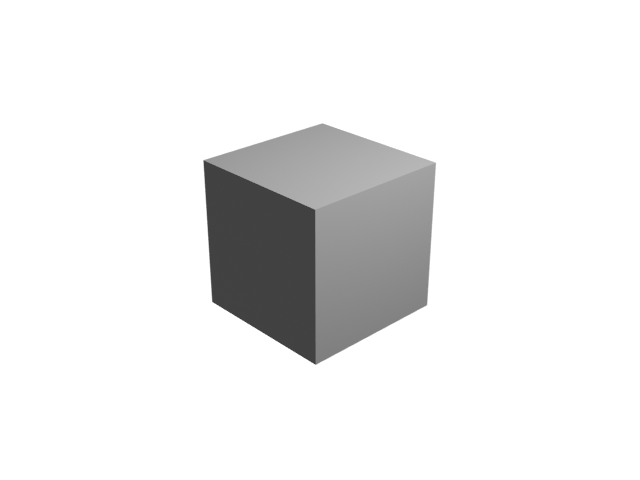

In [55]:
from IPython import display

display.Image("./images/image.png")

In [7]:
# create widgets for interactive parameter input
import ipywidgets as widgets

length = widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Lenght:',
    value=3,
    continuous_update=False
)

width = widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Width:',
    value=3,
    continuous_update=False
)
height = widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Height:',
    value=3,
    continuous_update=False
)


In [48]:
%%capture
import ipywidgets as widgets
def slider_eventhandler(length, width, height):
    #print(f'{length},{width},{height}')
    # write parameters to dict
    parameters['length'] = length
    parameters['width'] = width
    parameters['height'] = height
    # save parameters as json
    with open(par_file, 'w') as outfile:
        json.dump(parameters, outfile)
    #print(parameters)
    
    # run blender
    #!blender -b -y parametric_screw_conveyor.blend --python run_blender.py;
    display.Image("./images/image.png")

In [54]:
out = widgets.interactive_output(slider_eventhandler, {'length': length, 'width': width, 'height': height})

widgets.HBox([widgets.VBox([length, width, height]), out])

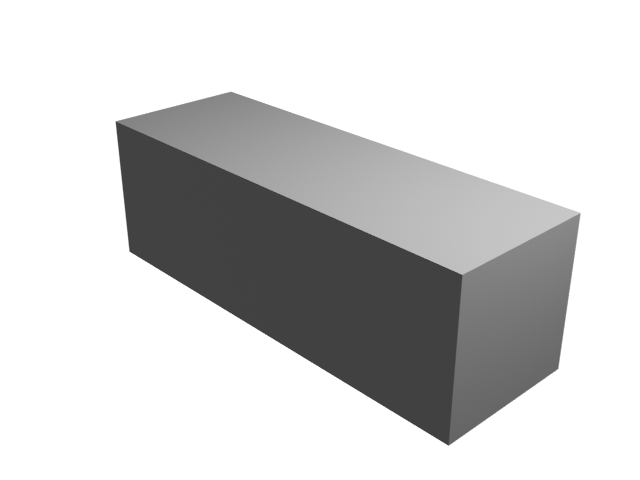

In [56]:
display.Image("./images/image.png")